# **Filters in Frequency Domain**
**Notebook creado por [Marlon Tecotl](https://www.linkedin.com/in/marlon-tecotl/) para el Master en [Vision Artificial](https://www.techtitute.com/informatica/master/master-vision-artificial) en [Tech](https://www.techtitute.com/) (2024).**


Importamos las librerias

In [1]:
# importamos las libreiras
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8, 8]
import cv2
import numpy as np
import seaborn as sns
from scipy import signal

###  **Funcion coseno 1D**
En este primer apartado vamos a realizar varios ejercicios para entender como funcionan las transformadas de fourier aplicadas a procesamiento de imagenes. En primer lugar vamos a crear una funcion coseno con una frecuencia de 1/4 y una amplitud entre 0 y 1 usando numpy y mostrandola con matplotlib. 
Podemos encontar info en el siguiente [link](https://pythonforundergradengineers.com/plotting-sin-cos-with-matplotlib.html)

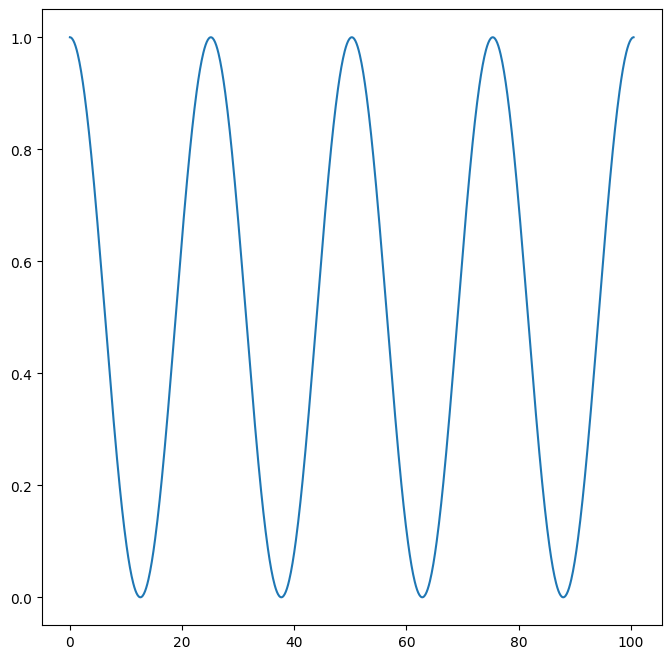

In [2]:
# definimos parametros
frecuency = 1/4

# definimos la funcion
x = np.arange(0, 32*np.pi, 0.1)
y = (np.cos(frecuency * x) + 1)/2

# mostramos el resultado
plt.plot(x,y)
plt.show()

###  **Funciones coseno 2D**
A continuacion se pide crear dos imagenes de tamaño 300x300 que representen funciones coseno, la primera con una frecuencia de 1/8 en vertical y la segunda con 1/4 en horizontal. La amplitud debera ser entre 0 y 255.

El resultado deberia ser:


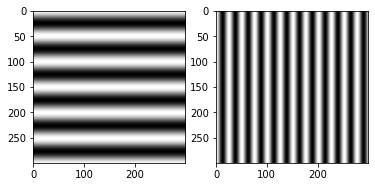

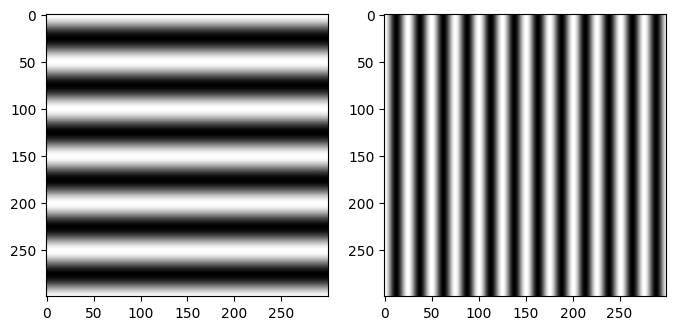

In [3]:
# definimos las variables
frecuency = 1/8
image_size = 300

# creamos los arrays vacios
vertical_cos = np.zeros((image_size, image_size), dtype=np.uint8)
horizontal_cos = np.zeros((image_size, image_size), dtype=np.uint8)

# iteramos la imagen
for x in range(image_size):
  for y in range(image_size):
    # creamos la funcion
    vertical_cos[x, y] = round((np.cos(frecuency * x) + 1)/2 *255)
    horizontal_cos[y, x] = round((np.cos(2*frecuency * x) + 1)/2 *255)

# mostramos los resultados
plt.subplot(121),plt.imshow(vertical_cos, cmap = 'gray')
plt.subplot(122),plt.imshow(horizontal_cos, cmap = 'gray')
plt.show()


###  **Sumar las dos funciones**
A continuacion vamos a sumar las dos imagenes. Usar el metodo [cv2.add()](https://docs.opencv.org/4.x/d0/d86/tutorial_py_image_arithmetics.html).
El resultado deberia ser:


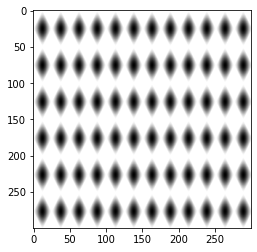

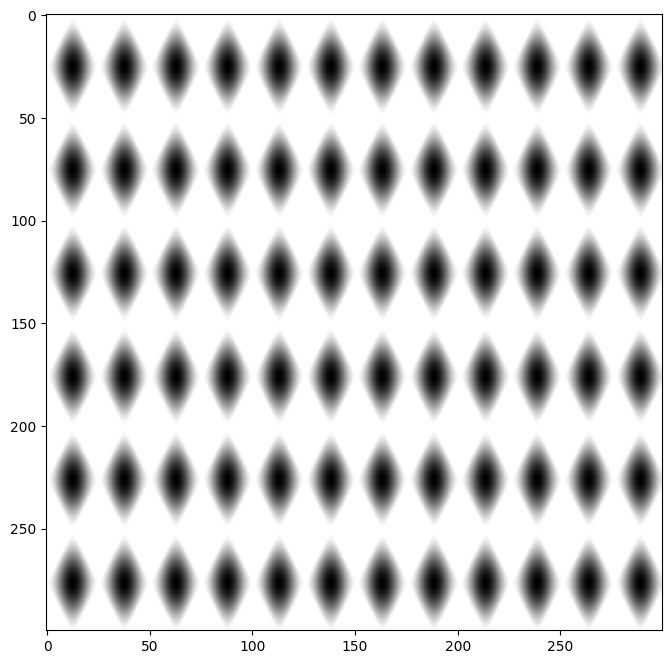

In [4]:
# sumamos las dos funciones
sum_cos = cv2.add(vertical_cos, horizontal_cos)

# mostramos el resultado
plt.imshow(sum_cos, cmap = 'gray')
plt.show()

###  **Transformada de fourier con numpy**
Em esta actividad vamos a representar las imagenes anteriores en el espacio de frecuencia. Podemos encontrar el procedimiento en el siguiente [link](https://docs.opencv.org/3.4/de/dbc/tutorial_py_fourier_transform.html).

El resultado esperado para la imagen anterior es el siguiente:


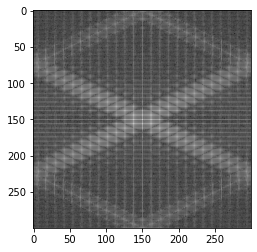

-72.93919607708115
334.39272479912813


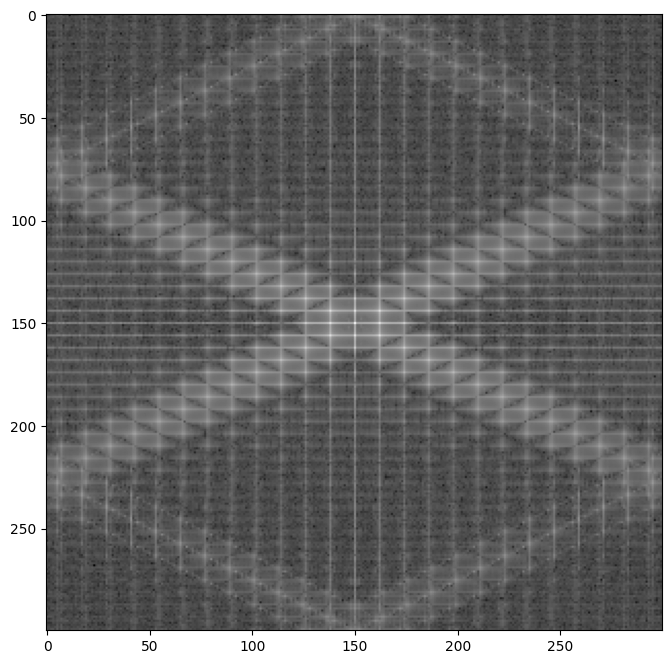

In [5]:
# usamos las funciones de numpy para calculo de la transformada de fourier
f = np.fft.fft2(sum_cos)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

# mostramos los valores maximos del espectro
print(np.min(magnitude_spectrum))
print(np.max(magnitude_spectrum))

# mostramos la imagen resultante en el espacio frecuencial
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

###  **Transformada inversa fourier con numpy**
Em esta actividad vamos a invertir el paso anterior, el resultado deberia ser el volver a la imagen original. Mas [info](https://docs.opencv.org/3.4/de/dbc/tutorial_py_fourier_transform.html)

0.0
255.0


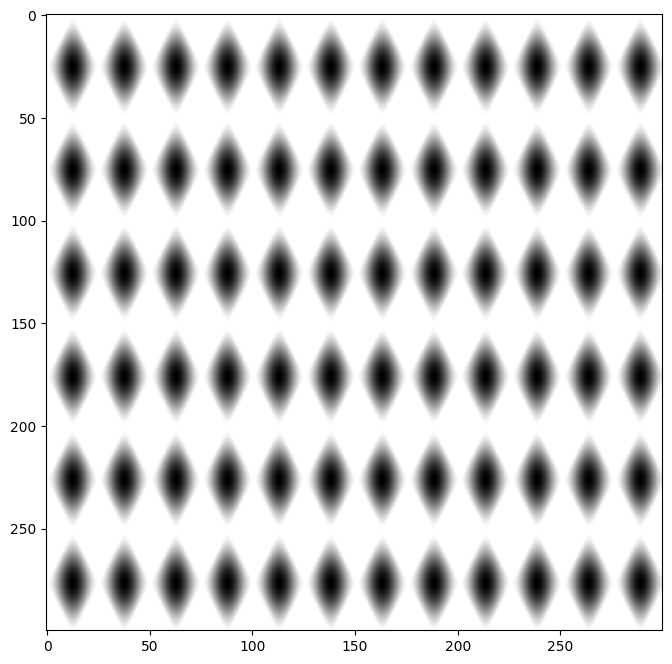

In [6]:
# usamos las funciones de numpy para calculo de la transformada de fourier inversa
f = np.fft.ifftshift(fshift)
sum_cos = np.abs(np.round(np.fft.ifft2(f)))

# mostramos los valores maximos del espectro
print(np.min(sum_cos))
print(np.max(sum_cos))

# mostramos la imagen resultante
plt.imshow(sum_cos, cmap='gray')
plt.show()

###  **Filtros en imagenes en espacio frecuencial**
A continuacion vamos a crear una señal gausiana 1D que posteriormente convertiremos en una imagen para crear un filtro paso alto.

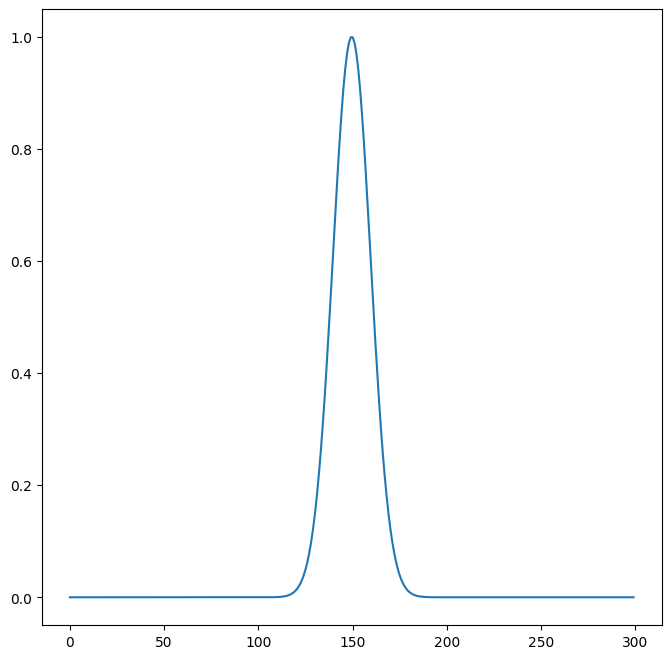

In [7]:
gaussian = signal.gaussian(image_size, std=10)
plt.plot(gaussian)
plt.show()

Siguiendo los pasos anteriores, vamos a convertir esta gausiana en dos imagenes 2D de 300x3000, una que represnte la gausiana en horizontal y la otra en vertical. El resultado esperado es el siguiente:

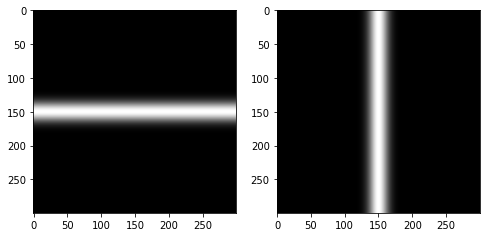

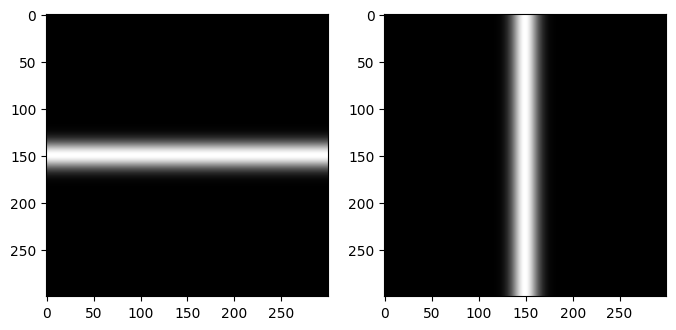

In [8]:
vertical_gaussian = np.zeros((image_size, image_size), dtype=np.uint8)
horizontal_gaussian = np.zeros((image_size, image_size), dtype=np.uint8)

for x in range(image_size):
  for y in range(image_size):
    vertical_gaussian[x, y] = gaussian[x] * 255
    horizontal_gaussian[y, x] = gaussian[x] * 255

plt.subplot(121),plt.imshow(vertical_gaussian, cmap = 'gray')
plt.subplot(122),plt.imshow(horizontal_gaussian, cmap = 'gray')
plt.show()

###  **Sumar las dos funciones**
A continuacion vamos a sumar las dos imagenes. Usar el metodo [cv2.add()](https://docs.opencv.org/4.x/d0/d86/tutorial_py_image_arithmetics.html).
El resultado deberia ser:


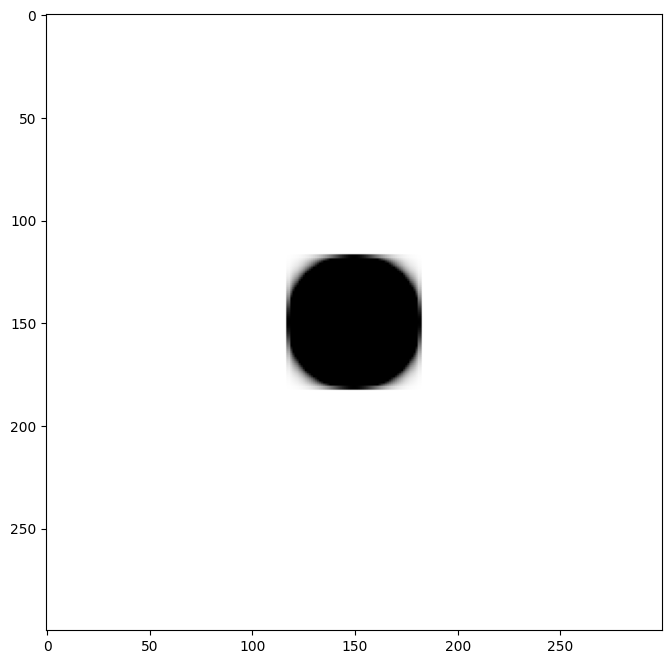

In [9]:
# creamos el filtro
filter = cv2.bitwise_not(cv2.multiply(vertical_gaussian, horizontal_gaussian))

# mostramos el resultado
plt.imshow(filter, cmap = 'gray')
plt.show()

###  **Transformada de fourier con numpy**
Em esta actividad vamos a representar las imagenes anteriores en el espacio de frecuencia. Podemos encontrar el procedimiento en el siguiente [link](https://docs.opencv.org/3.4/de/dbc/tutorial_py_fourier_transform.html).

El resultado esperado para la imagen anterior es el siguiente:

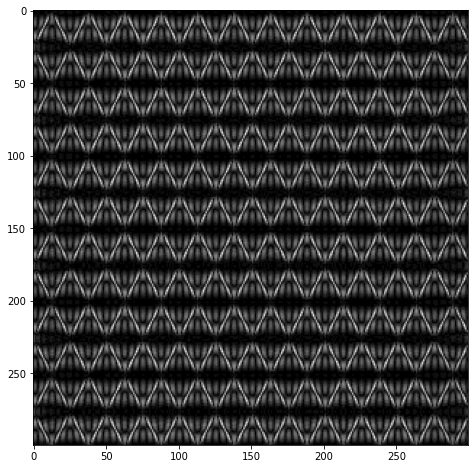

0.0
18.0


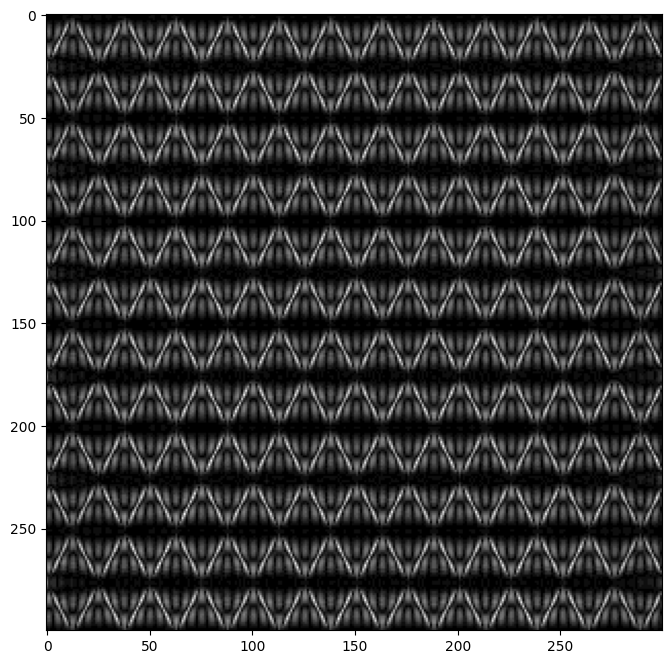

In [10]:
# normalizamos el filtro
filter = filter/255

# aplicamos la mascara
fshift = fshift * filter

# calculamos la transformada de fourieer
f = np.fft.ifftshift(fshift)
sum_cos = np.abs(np.round(np.fft.ifft2(f)))

# mostramos los resultados
print(np.min(sum_cos))
print(np.max(sum_cos))
plt.imshow(sum_cos, cmap='gray')
plt.show()

###  **Filtros en el dominio frecuencial usando opencv**
A continuacion vamos a ver que posibilidades nos brinda la libreria opencv en relacion a los filtros en el espacio frecuencial. En primer lugar vamos a cargar la siguiente imagen:

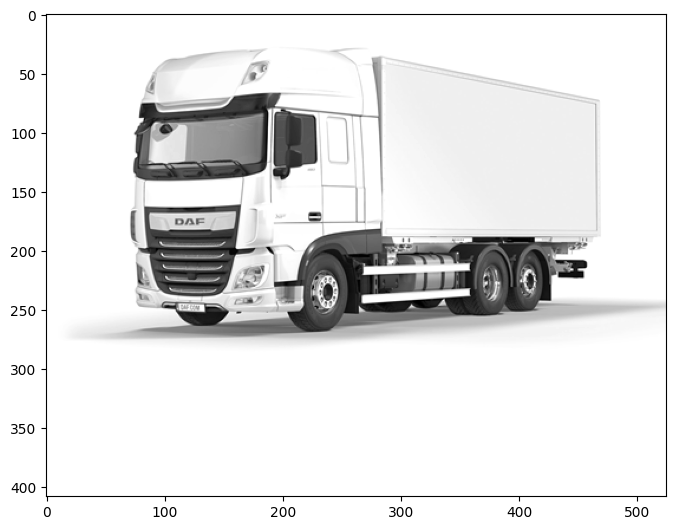

In [11]:
# nombre de la imagen a cargar
image_path = 'data/truck.png'

# cargamos la imagen
image  = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_RGB2GRAY)
plt.imshow(image, cmap='gray')
plt.show()

###  **Transformada de fourier numpy y opencv**
En esta actividad se pide reprentar la imagen del camion en el espacio frecuencial usando numpy. El resultado con ambas operaciones deberia ser:



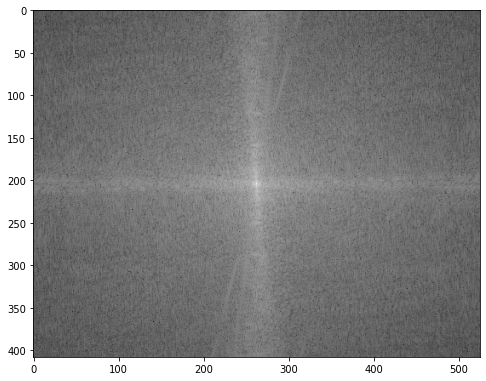

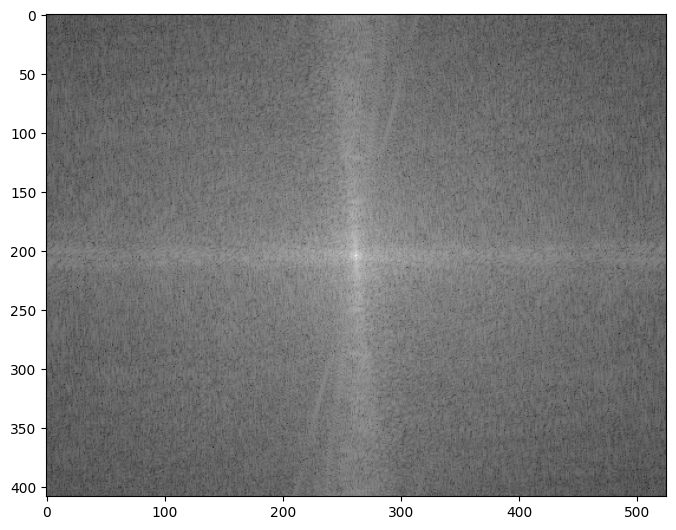

In [12]:
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

A continuacion se pide el mismo procedimineto usando la funcion de opencv.

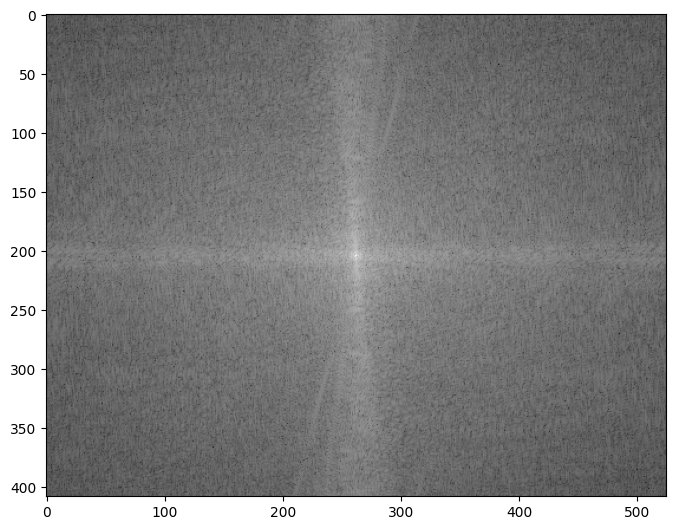

In [13]:
# calculamos la transformada de fourier de la imagen
dft = cv2.dft(np.float32(image),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

# mostramos los resultados
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

###  **Filtro frecuencial - Filtro paso alto**
A continuacion se pide filtrar la imagen usando el filtro gausiano creado anteriormente. Este filtro es un filtro paso alto que eliminara las bajas frecuencias de la imagen. Mostrar el filtro y el resultado obtenido que deberia ser como el siguiente:



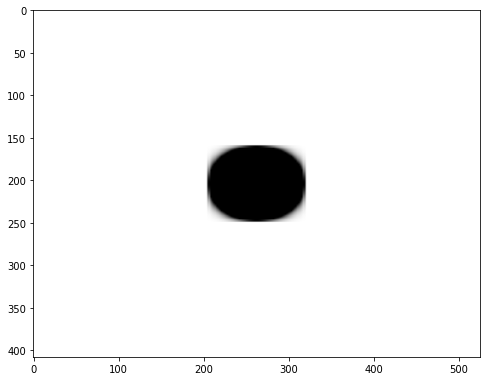

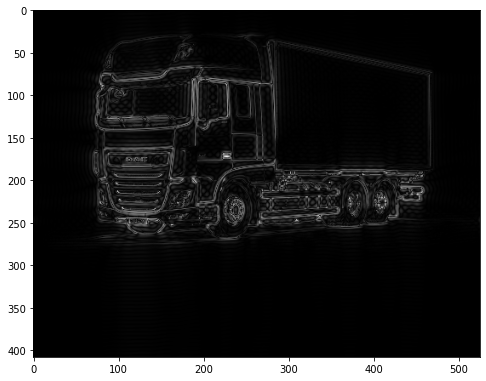

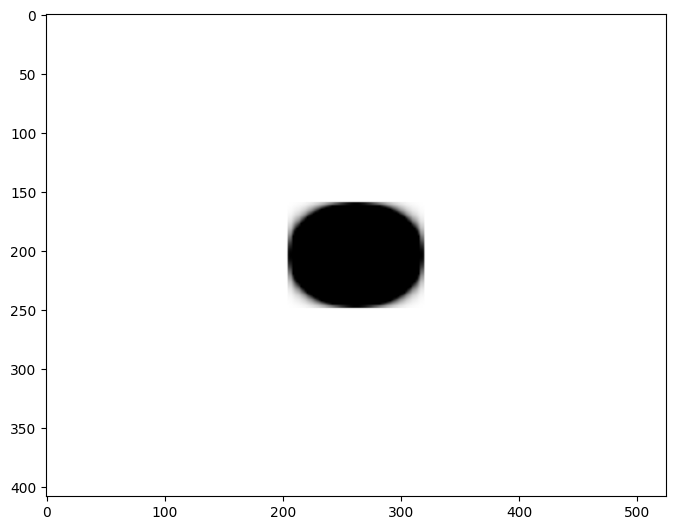

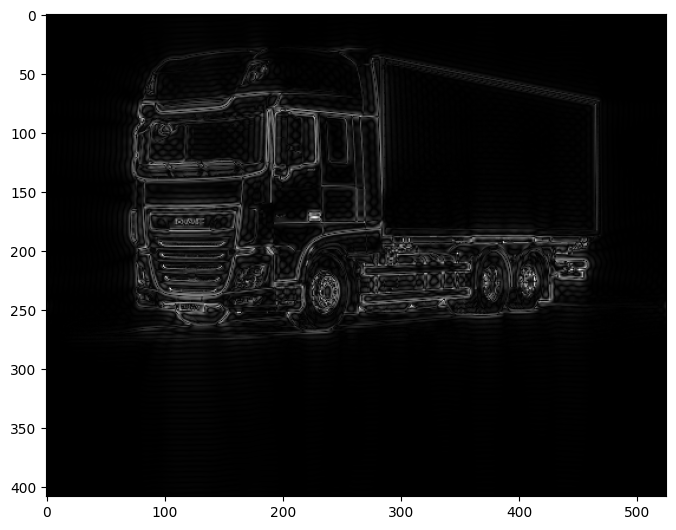

In [14]:
# creamos el filtro usando la gausiana calculada anteriormente
filter = cv2.bitwise_not(cv2.multiply(vertical_gaussian, horizontal_gaussian))

# adaptamos el tamaño del filtro al tamaño de la imagen
high_pass_filter =cv2.resize(filter, (image.shape[1], image.shape[0]))

# mostramo el filtro
plt.imshow(high_pass_filter, cmap='gray')
plt.show()

# aplicamos el filtro
fshift_inv = fshift * high_pass_filter

# realizamos la transformada inversa y mostramos el resultado
f = np.fft.ifftshift(fshift_inv)
sum_cos = np.abs(np.round(np.fft.ifft2(f)))
plt.imshow(sum_cos, cmap='gray')
plt.show()


###  **Representacion 3d del filtro**
A continuacion se pide mostrar el filtro gausiano en 3D. Podemos consultar como hacerlo en el siguiente [link](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)

Este es el resultado que debemos obtener:


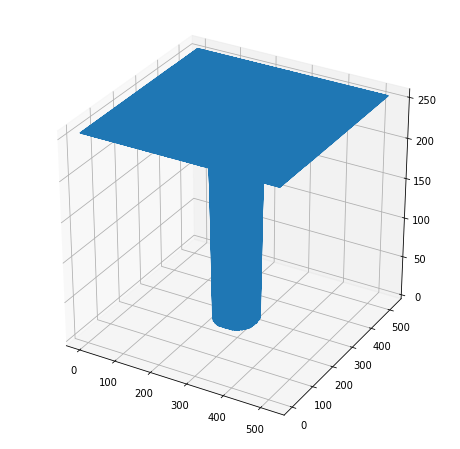

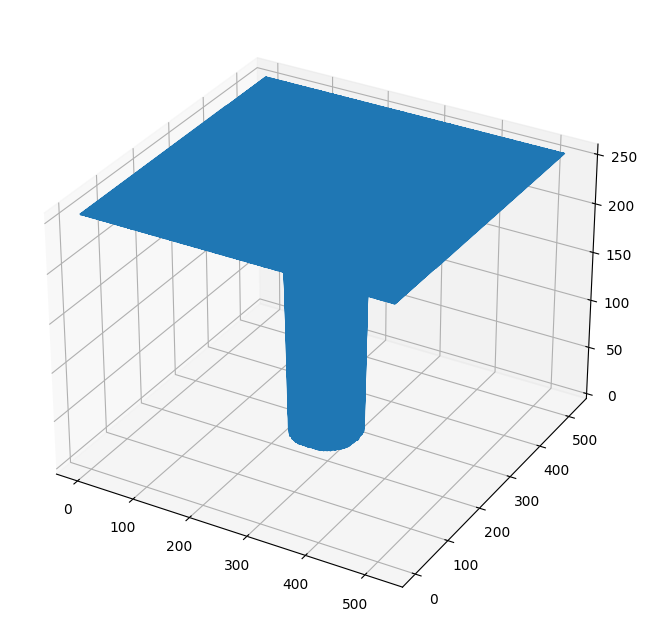

In [15]:
# mostramos la representacion del filtro en 3d
fig = plt.figure()
ax = plt.axes(projection="3d")
arange = np.arange(0, high_pass_filter.shape[1] , 1, dtype= int)
x = np.repeat(arange, high_pass_filter.shape[0])
y = np.vstack([arange] * high_pass_filter.shape[0]).flatten()
z = high_pass_filter.flatten()

ax.plot3D(x, y, z)

plt.show()

###  **Filtro frecuencial - Filtro paso bajo**
A continuacion se pide filtrar la imagen usando el filtro gausiano creado anteriormente pero invertido. Este filtro es un filtro paso bajo que eliminara las altas frecuencias de la imagen. Mostrar el filtro y el resultado obtenido que deberia ser como el siguiente:

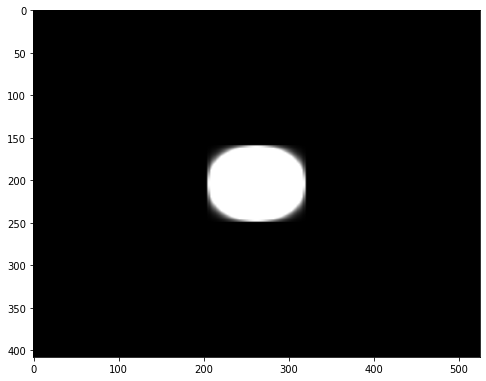

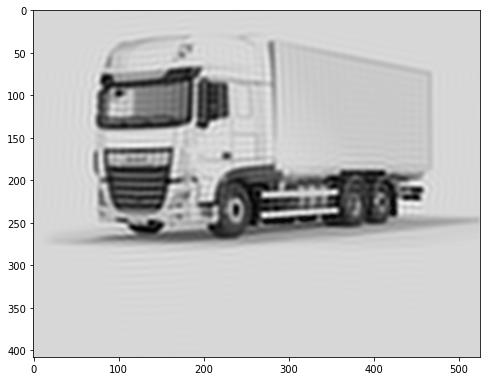

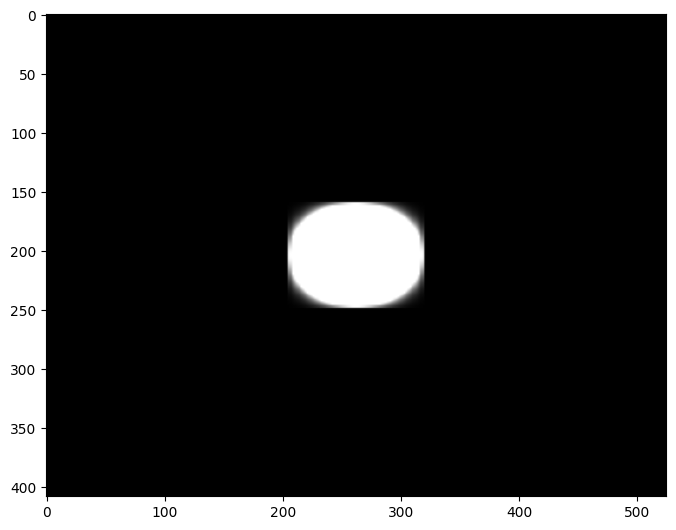

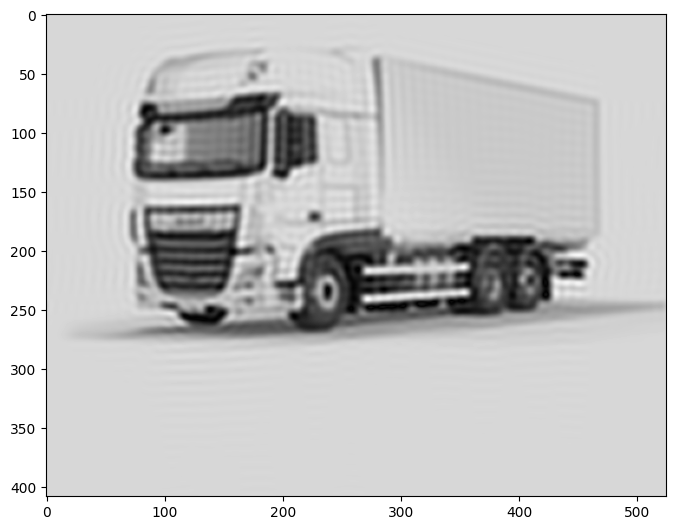

In [16]:
# invertimos el filtro gausiano
low_pass_filter = cv2.bitwise_not(high_pass_filter)

# mostramos el filtro
plt.imshow(low_pass_filter, cmap='gray')
plt.show()

# apply mask and inverse DFT
fshift_inv = fshift * low_pass_filter

# calculamos la transformada inversa
f = np.fft.ifftshift(fshift_inv)
sum_cos = np.abs(np.round(np.fft.ifft2(f)))
plt.imshow(sum_cos, cmap='gray')
plt.show()


###  **Representacion 3d del filtro**
A continuacion se pide mostrar el filtro gausiano en 3D. Podemos consultar como hacerlo en el siguiente [link](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)

Este es el resultado que debemos obtener:


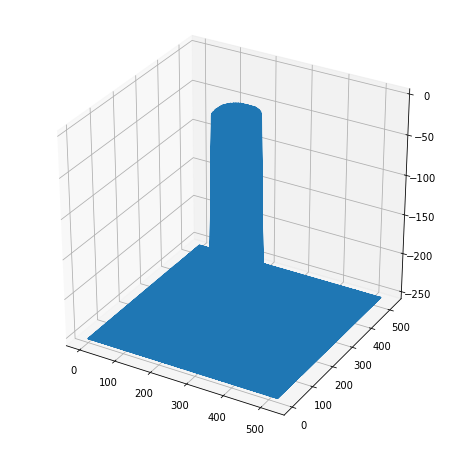

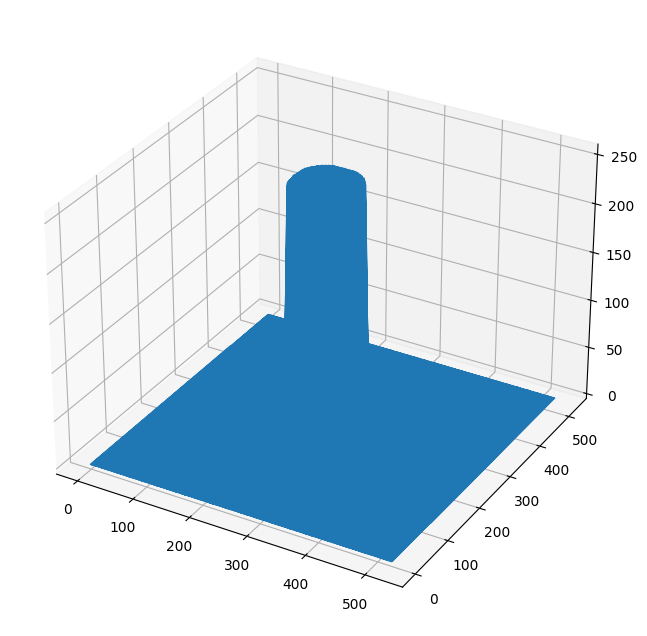

In [17]:
# mostramos el filtro en 3d
fig = plt.figure()
ax = plt.axes(projection="3d")
arange = np.arange(0, image.shape[1] , 1, dtype= int)
x = np.repeat(arange, image.shape[0])
y = np.vstack([arange] * image.shape[0]).flatten()
z = low_pass_filter.flatten()

ax.plot3D(x, y, z)

plt.show()

###  **Filtros paso alto en imagenes**
A continuacion se pide crear un filtro paso alto para reslatar los bordes de la imagen usando el siguiente kernel:


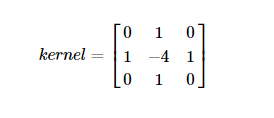

Utilizar la funcion de opencv [c2.filter2D()](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html) para convolucionar la imagen y el filtro. El resultado esperado debe ser como el siguiente:

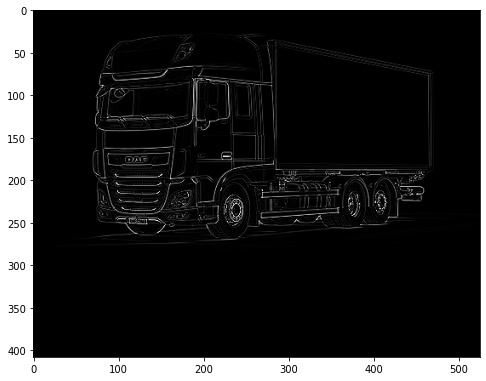

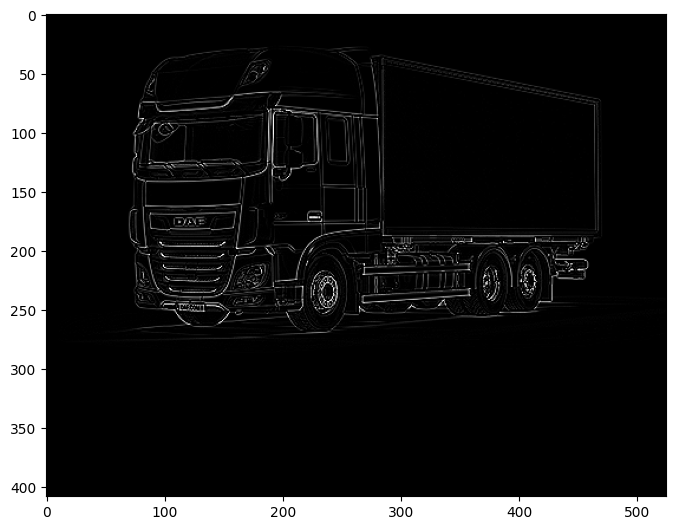

In [18]:
# creamos el filtro
kernel = np.array([[0.0, -1.0, 0.0], 
                   [-1.0, 4.0, -1.0],
                   [0.0, -1.0, 0.0]])
hp = cv2.filter2D(image,-1,kernel)
plt.imshow(hp, cmap='gray')
plt.show()

###  **Filtro laplace**
A continuacion se pide filtrar la imagen usando el filtro de laplace, [cv2.Laplacian](https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html)

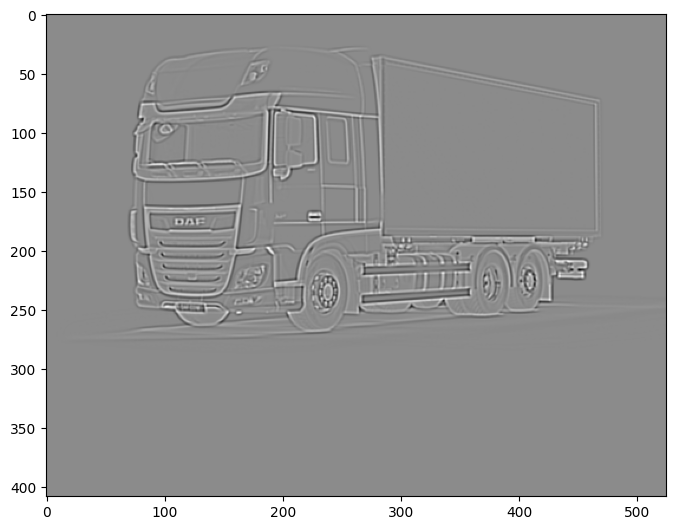

In [19]:
laplacian = cv2.Laplacian(image,cv2.CV_64F, ksize = 5)
plt.imshow(laplacian, cmap='gray')
plt.show()

###  **Filtro sobel**
A continuacion se pide filtrar la imagen usando el filtro de sobel en x, [cv2.Sobel](https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html)

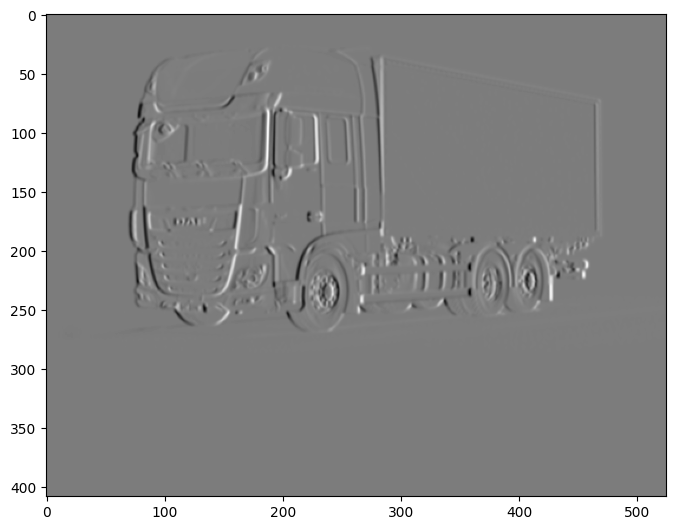

In [20]:
sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
plt.imshow(sobelx, cmap='gray')
plt.show()

###  **Filtro sobel**
A continuacion se pide filtrar la imagen usando el filtro de sobel en y, [cv2.Sobel](https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html)

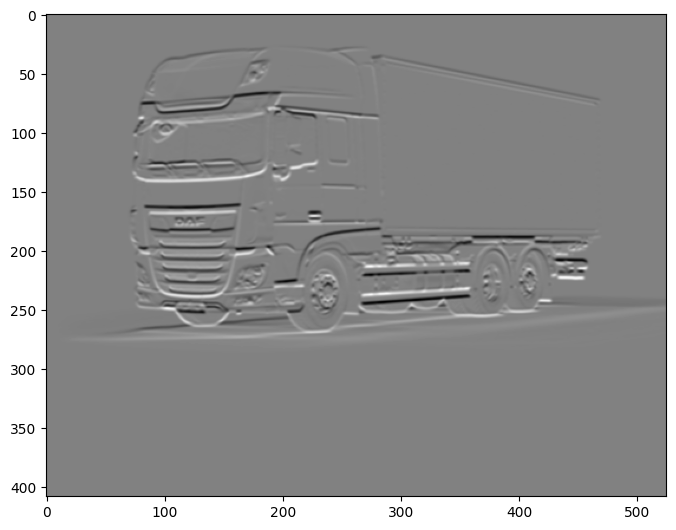

In [21]:
sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)
plt.imshow(sobely, cmap='gray')
plt.show()

###  **Scharr Filter**
A continuacion se pide filtrar la imagen usando el filtro de scharr, [mas info](https://docs.opencv.org/3.4/d5/d0f/tutorial_py_gradients.html)

Para ello deberemos aplicar los siguientes kernels para los gradientes horizontales y verticales y la combinacion de ambos para el filtrado bilateral.

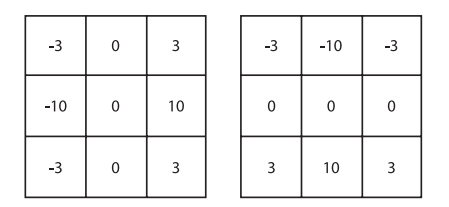

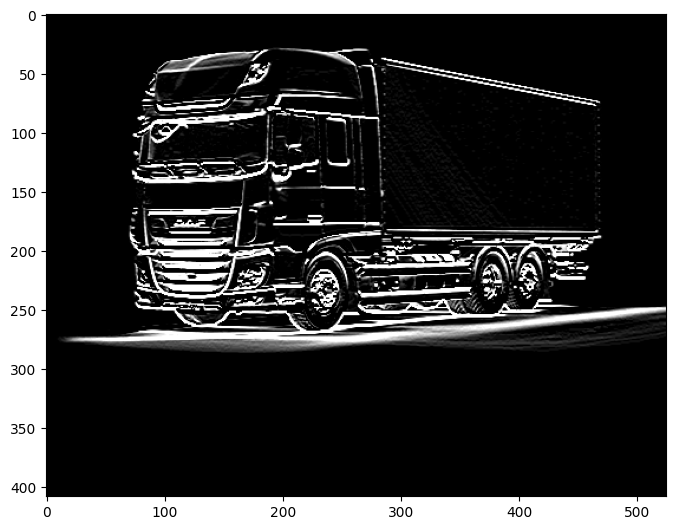

In [22]:
# creamos el filtro
kernel = np.array([[-3.0,-10.0,-3.0], 
                   [0.0, 0.0, 0.0],
                   [3.0, 10.0, 3.0]])
Scharr = cv2.filter2D(image,-1,kernel)
plt.imshow(Scharr, cmap='gray')
plt.show()

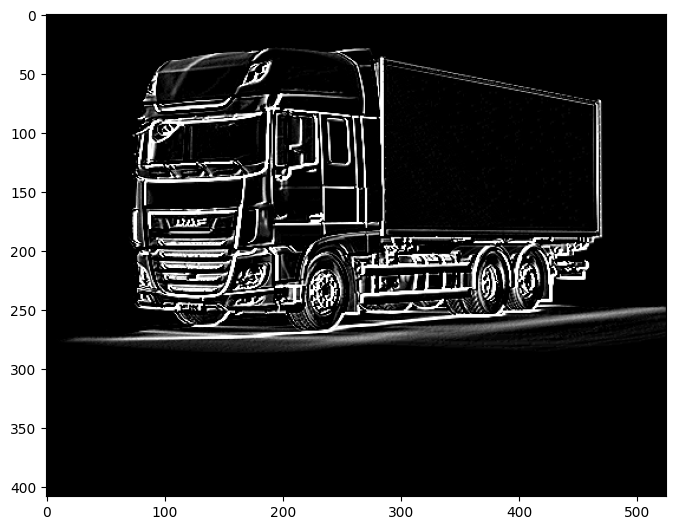

In [23]:
# creamos el filtro
kernel = np.array([[-3.0, 0.0,-3.0], 
                   [-10.0, 0.0, 10.0],
                   [3.0, 0.0, 3.0]])
Scharr = cv2.filter2D(image,-1,kernel)
plt.imshow(Scharr, cmap='gray')
plt.show()

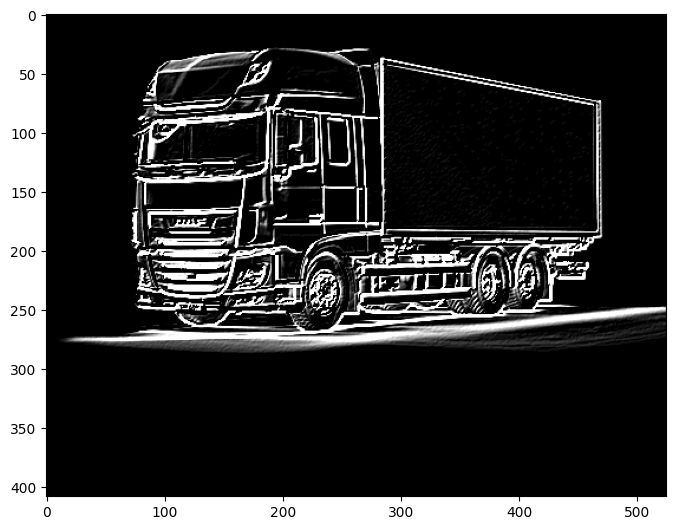

In [24]:
# creamos el filtro
kernel = np.array([[-3.0, -10.0,-3.0], 
                   [-10.0, 0.0, 10.0],
                   [3.0, 10.0, 3.0]])
Scharr = cv2.filter2D(image,-1,kernel)
plt.imshow(Scharr, cmap='gray')
plt.show()

###  **Canny Filter**
A continuación se pide filtrar la imagen utilizando el filtro de detección de contornos [canny](https://learnopencv.com/edge-detection-using-opencv/)

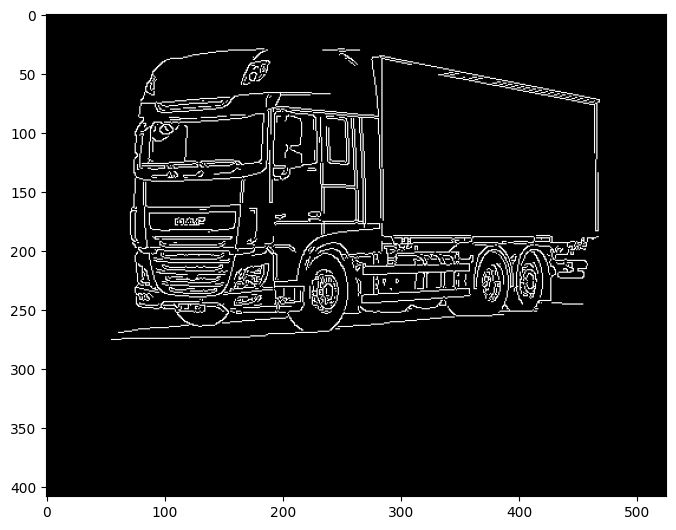

In [25]:
canny = cv2.Canny(image,100,200)
plt.imshow(canny, cmap='gray')
plt.show()